In [367]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

top100 = pd.read_csv('top100videogamesales.csv')

top100.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## 1. Chart showing the sales by region for each publisher

##### In North America, Microsoft Game Studios has the most sales

##### In Japan and the EU, Nintendo has the most sales

<Axes: xlabel='NA_Sales', ylabel='Publisher'>

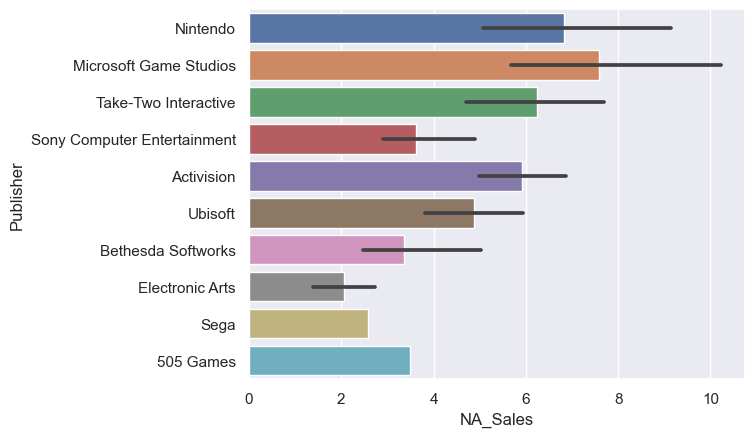

In [20]:
sns.barplot(data=top100, x='NA_Sales',y='Publisher')


<Axes: xlabel='JP_Sales', ylabel='Publisher'>

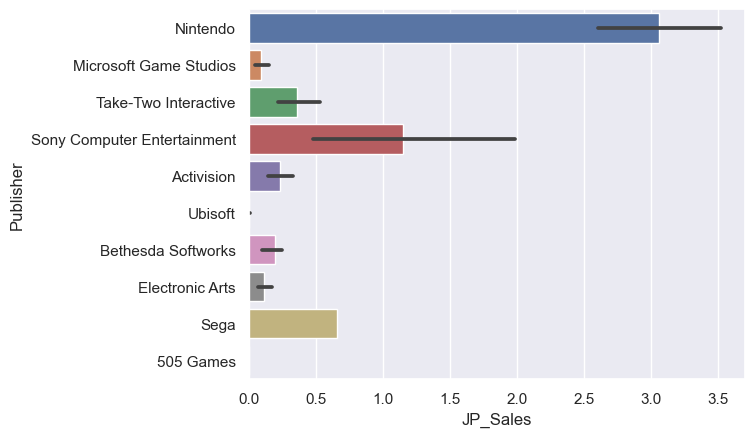

In [21]:
sns.barplot(data=top100, x='JP_Sales',y='Publisher')

<Axes: xlabel='EU_Sales', ylabel='Publisher'>

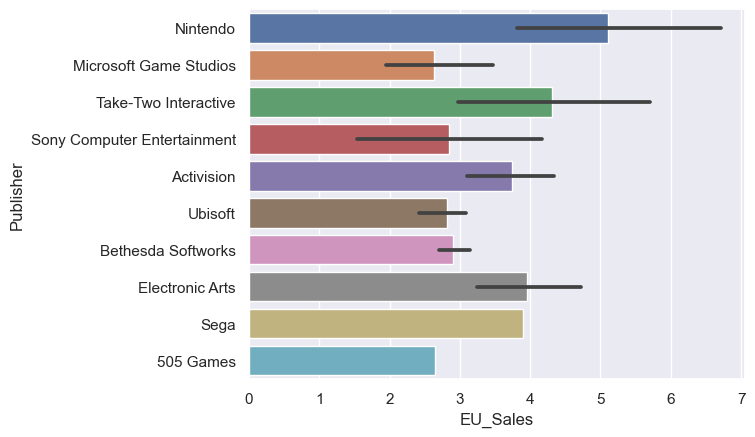

In [22]:
sns.barplot(data=top100, x='EU_Sales',y='Publisher')

## 2. A line chart showing the total global sales each year

In [117]:
top100.head(5)
globalsales= top100.loc[:,['Year','Global_Sales']]
globalsales.head()

,Year,Global_Sales
0,2006,82.74
1,2008,35.82
2,2009,33.00
3,2006,30.01
4,2006,29.02


In [126]:
group_by_year =globalsales.groupby('Year')
totalglobalsales=group_by_year.sum()
totalglobalsales.head(5)

,Global_Sales
Year,
2001,43.20
2002,38.83
2003,14.15
2004,68.77
2005,110.36


### Explanation

#### The line graph below illustrates the Global Sales performance observed between the years 2001 and 2015.Overall, the sales data reveals a pattern of fluctuations with sales reaching its lowest point in 2003 and its highest point in 2006 at 170 million dollars.However, this record high was swiftly followed by a sharp decline in 2007 ,plummeting to 90 million dollars which is approximately 50% lower than the previous year.There is a notable resurgence in sales between 2008 and 2009, rebounding to 140 million dollars.Unfortunately,sales began to steadily decline after 2009.  




<Axes: xlabel='Year', ylabel='Global_Sales'>

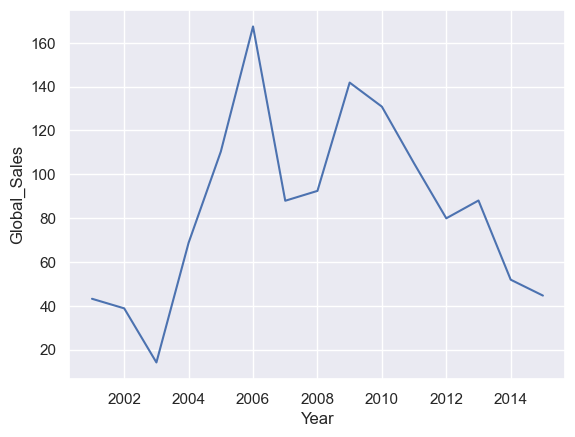

In [121]:
sns.lineplot(data=totalglobalsales,x='Year',y='Global_Sales')


## 3.  A Histogram showing the global sales distribution for games with Action as the genre.

##### The histogram below illustrates that Global Sales were distributed between 7 and 12 dollars.
##### There are 6 observations between 7 - 9 dollars and 4 observations between 9 and 12 dollars.

In [113]:
actionGenre=top100.loc[top100['Genre']== 'Action' ]
actionGenre.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11,12,Grand Theft Auto V,PlayStation,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
12,13,Grand Theft Auto: San Andreas,PlayStation,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


<Axes: xlabel='Global_Sales', ylabel='Count'>

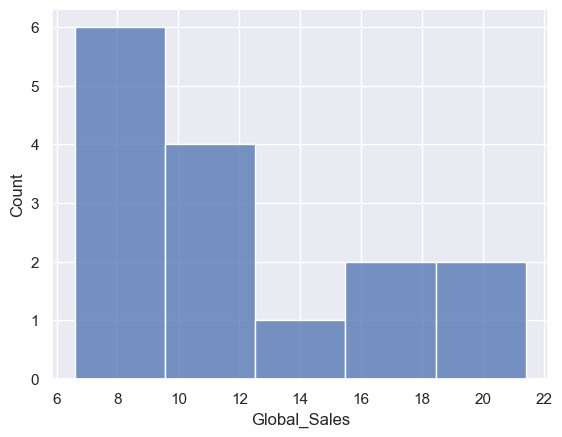

In [110]:
sns.histplot(data=actionGenre,x='Global_Sales',bins=5)

## 4. The percentage of North American Sales by Genre




In [91]:

NorthAmerica= top100.loc[:,['Genre','NA_Sales']]

NorthAmerica.head()

,Genre,NA_Sales
0,Sports,41.49
1,Racing,15.85
2,Sports,15.75
3,Platform,11.38
4,Misc,14.03


### Task 1
#### Grouping the genres and using the sum() function
#### Creating a new column to show the percentage

In [198]:
group_by_genre=NorthAmerica.groupby('Genre')
Total=group_by_genre.sum()
Total.head(10)

Total['% of Total']=Total['NA_Sales'].apply(lambda x: 100* x /Total['NA_Sales'].sum())
Total.head(10)


,NA_Sales,% of Total
Genre,,
Action,77.81,13.752938
Fighting,14.40,2.545204
Misc,70.60,12.478569
Platform,52.67,9.309437
Puzzle,3.44,0.608021
Racing,56.45,9.977553
Role-Playing,50.48,8.922354
Shooter,140.44,24.822808
Simulation,14.61,2.582321


### Task 2

#### Sorting Values to slice dataframe

In [236]:
Total=Total.sort_values(by=['NA_Sales'], ascending=False)
Total.head(15)

,NA_Sales,% of Total
Genre,,
Shooter,140.44,24.822808
Sports,84.87,15.000795
Action,77.81,13.752938
Misc,70.60,12.478569
Racing,56.45,9.977553
Platform,52.67,9.309437
Role-Playing,50.48,8.922354
Simulation,14.61,2.582321
Fighting,14.40,2.545204


#### Slicing the Dataframe

In [342]:
Total1 = Total.iloc[:7]
Total2 = Total.iloc[7:]

Total1.head()

,NA_Sales,% of Total
Genre,,
Shooter,140.44,24.822808
Sports,84.87,15.000795
Action,77.81,13.752938
Misc,70.60,12.478569
Racing,56.45,9.977553


In [343]:

Total2.head()




,NA_Sales,% of Total
Genre,,
Simulation,14.61,2.582321
Fighting,14.40,2.545204
Puzzle,3.44,0.608021


### Task 3
#### Summing the low percentage dataframe and adding a new row named 'Other' to the dataframe

In [346]:

Total2=Total2.append(Total2.sum().rename('Other:Simulation,Fighting,Puzzle'))


/var/folders/86/09bx2_dx25b9p4352_slh92m0000gn/T/ipykernel_5807/1025028238.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total2=Total2.append(Total2.sum().rename('Other:Simulation,Fighting,Puzzle'))


#### Slicing then appending to the Total dataframe creating a new dataframe

In [347]:
slice_total2=Total2.iloc[3:]

slice_total2.head()

,NA_Sales,% of Total
Genre,,
"Other:Simulation,Fighting,Puzzle",32.45,5.735546


### Task 4

#### Combining two dataframes to form a brand new dataframe to create a pie chart

In [348]:
newTotal=Total1.append(slice_total2)
newTotal.head(10)

/var/folders/86/09bx2_dx25b9p4352_slh92m0000gn/T/ipykernel_5807/2482689665.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTotal=Total1.append(slice_total2)


,NA_Sales,% of Total
Genre,,
Shooter,140.44,24.822808
Sports,84.87,15.000795
Action,77.81,13.752938
Misc,70.60,12.478569
Racing,56.45,9.977553
Platform,52.67,9.309437
Role-Playing,50.48,8.922354
"Other:Simulation,Fighting,Puzzle",32.45,5.735546


## Pie Chart Explanation

#### The pie chart provides a visual representation of North American game sales by genre,highlighting the distribution of sales within the gaming industry. The chart is divided into 8 categories,showing 'Shooter" games dominating the North American gaming market comprising  a quarter of all sales.This genre's popularity is evident with titles like Call of Duty and Halo 3 contributing significantly to the overall sales figure.'Sport' games represent the second largest category, constituting 15% of the total sales. This suggest a substantial audience for sports-related gaming experiences with Wii products.Games in the 'Other' category, Simulation (2.5%), Fighting (2.5%) and Puzzle (<1%) make up the smallest portion of the market accounting for just 6 % in overall sales combined.

Text(0.5, 1.0, 'North American Sales by Genre')

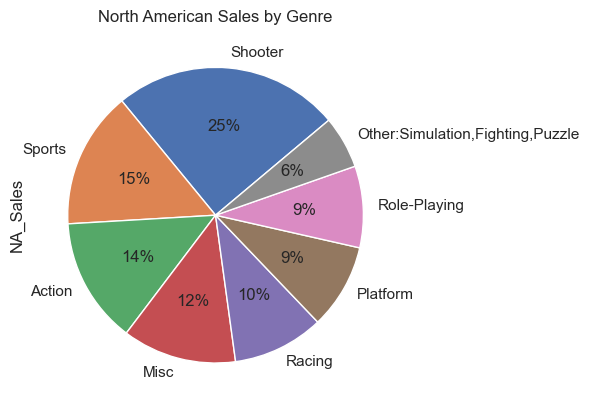

In [349]:

newTotal['NA_Sales'].plot(kind='pie', y='Genre', autopct='%1.0f%%',startangle=40, legend=False)
plt.title("North American Sales by Genre")


## 5. The Percentage of European Sales by Genre

In [92]:
Europe= top100.loc[:,['Genre','EU_Sales']]

Europe.head()

,Genre,EU_Sales
0,Sports,29.02
1,Racing,12.88
2,Sports,11.01
3,Platform,9.23
4,Misc,9.20


In [352]:
group_by_genreEU=Europe.groupby('Genre')
TotalEU=group_by_genreEU.sum()
TotalEU.head(10)



TotalEU['% of Total']=TotalEU['EU_Sales'].apply(lambda x: 100* x /TotalEU['EU_Sales'].sum())
TotalEU.head(10)

,EU_Sales,% of Total
Genre,,
Action,58.15,13.947185
Fighting,5.00,1.199242
Misc,48.00,11.512724
Platform,33.12,7.943780
Puzzle,5.36,1.285588
Racing,44.03,10.560526
Role-Playing,36.20,8.682513
Shooter,81.63,19.578826
Simulation,23.26,5.578874


In [354]:
TotalEU=TotalEU.sort_values(by=['EU_Sales'], ascending=False)
TotalEU.head(10)

,EU_Sales,% of Total
Genre,,
Sports,82.18,19.710743
Shooter,81.63,19.578826
Action,58.15,13.947185
Misc,48.00,11.512724
Racing,44.03,10.560526
Role-Playing,36.20,8.682513
Platform,33.12,7.943780
Simulation,23.26,5.578874
Puzzle,5.36,1.285588


In [356]:
TotalEU1 = TotalEU.iloc[:7]
TotalEU2 = TotalEU.iloc[7:]

TotalEU1.head(10)

,EU_Sales,% of Total
Genre,,
Sports,82.18,19.710743
Shooter,81.63,19.578826
Action,58.15,13.947185
Misc,48.00,11.512724
Racing,44.03,10.560526
Role-Playing,36.20,8.682513
Platform,33.12,7.943780


In [357]:
TotalEU2.head()

,EU_Sales,% of Total
Genre,,
Simulation,23.26,5.578874
Puzzle,5.36,1.285588
Fighting,5.00,1.199242


In [358]:
TotalEU2=TotalEU2.append(TotalEU2.sum().rename('Other:Simulation,Fighting,Puzzle'))

/var/folders/86/09bx2_dx25b9p4352_slh92m0000gn/T/ipykernel_5807/1112385798.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TotalEU2=TotalEU2.append(TotalEU2.sum().rename('Other:Simulation,Fighting,Puzzle'))


In [359]:
slice_totalEU2=TotalEU2.iloc[3:]

slice_totalEU2.head()

,EU_Sales,% of Total
Genre,,
"Other:Simulation,Fighting,Puzzle",33.62,8.063704


In [361]:
newTotalEU=TotalEU1.append(slice_totalEU2)
newTotalEU.head(10)

/var/folders/86/09bx2_dx25b9p4352_slh92m0000gn/T/ipykernel_5807/2377582815.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  newTotalEU=TotalEU1.append(slice_totalEU2)


,EU_Sales,% of Total
Genre,,
Sports,82.18,19.710743
Shooter,81.63,19.578826
Action,58.15,13.947185
Misc,48.00,11.512724
Racing,44.03,10.560526
Role-Playing,36.20,8.682513
Platform,33.12,7.943780
"Other:Simulation,Fighting,Puzzle",33.62,8.063704


## Pie Chart Explanation

#### The pie chart below provides a visual representation of European game sales by genre,offering insights into the distribution of sales within the gaming industry in Europe. The chart is divided into 8 categories where 'Shooter' games hold a significant share of the European market at 20% and 'Sports' games hold the same amount of shares at 20%. Like the North American market, the  'Other' category,'Simulation'(5.5%), Fighting(1%), Puzzle (1%) games still maintain a notable presence,accounting for approximately  8%  European sales combined.

Text(0.5, 1.0, 'European Sales by Genre')

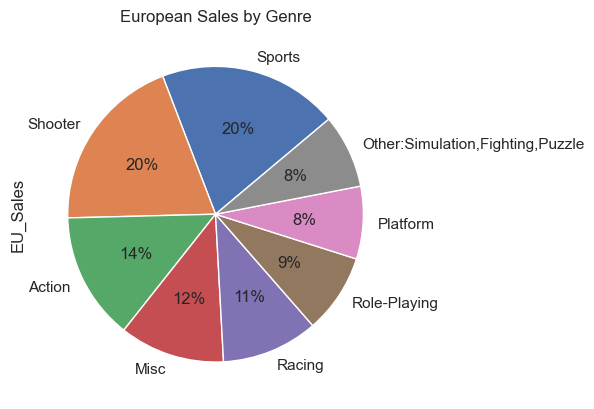

In [362]:
newTotalEU['EU_Sales'].plot(kind='pie', y='Genre', autopct='%1.0f%%',startangle=40, legend=False)
plt.title("European Sales by Genre")

## 6. Similarities and differences between North American and European Sales.

#### Sales in both regions are similar in most of the game categories.There is a  1% difference in most cases when comparing North America and European Sales.
#### The biggest difference we see however, is in the shooter game category.Shooter game sales  are 5% higher in North America than in Europe.Sales in the sports category is also 5% lower in North America compared to European Sales.Simulation game sales are also relatively higher in Europe than in North America.

## 7. Count of Games by Platform

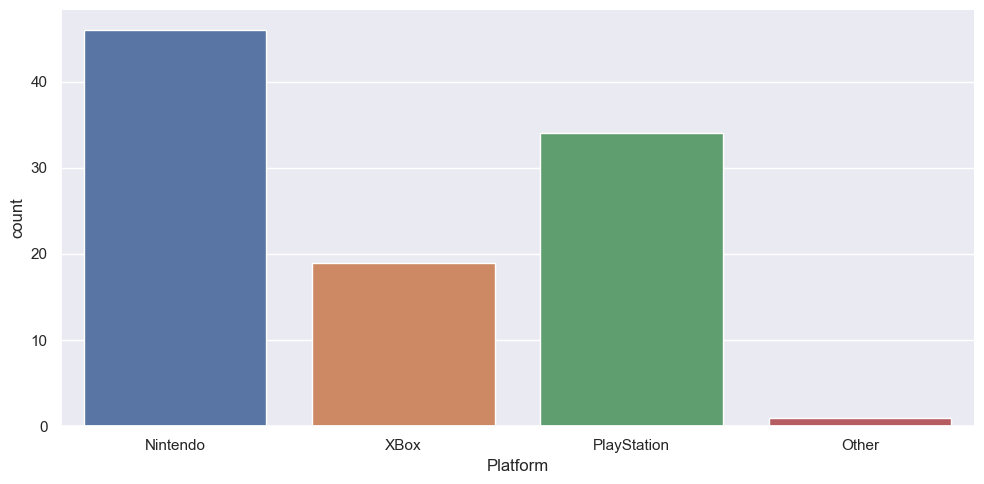

In [106]:
sns.catplot(kind='count', data=top100, x='Platform', aspect=2)

### Explanation
#### In the chart above, we see Nintendo created roughly 46 games, Xbox created roughly 18 games,Playstation created 34 games and Other created less than 5 games.